In [28]:
# importo le librerie necessarie 
import matplotlib.pyplot as plt   
import seaborn as sns            
import pandas as pd    

LEGGO IL CSV E STAMPO LE INFO 

In [29]:
df = pd.read_csv('CarsDatasets2025.csv', encoding='latin-1')

# Controllo dei valori mancanti per ogni colonna
print("Valori mancanti per colonna ")
print(df.isnull().sum())  # isnull() crea un booleano True/False per i NaN, sum() conta i valori mancanti

# --- INFO GENERALI SUL DATASET ---
print("\n--- INFO DEL DATASET ---")
print(df.info())  # Mostra tipo di dato, numero righe, valori nulli, memoria usata


Valori mancanti per colonna 
Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          3
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    6
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       1
dtype: int64

--- INFO DEL DATASET ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-nul

FUNZIONE PER PULIRE I DATI, ESTRAGGO SOLO I NUMERI ED ELIMINO LE STRINGHE (ES. horse power contiene cv dopo il numero)

In [30]:
# Funzione per estrarre solo i numeri
def to_numeric(series):
    return (
        series.astype(str)
              .str.extract(r'(\d+\.?\d*)')[0]   # prende il primo numero
              .astype(float)
    )

df["CC/Battery Capacity"] = to_numeric(df["CC/Battery Capacity"])
df["HorsePower"] = to_numeric(df["HorsePower"])
df["Total Speed"] = to_numeric(df["Total Speed"])
df["Performance(0 - 100 )KM/H"] = to_numeric(df["Performance(0 - 100 )KM/H"])
df["Torque"] = to_numeric(df["Torque"])


DOPO LA CONVERSIONE CONTROLLO IL NUMERO DEI NaN E LI SOSTITUISCO CON LA MEDIANA 

In [31]:
df.isna().sum()
df = df.fillna(df.median(numeric_only=True))


CREO UN PAIR PLOT SOLO DI COLONNE NUMERICHE 

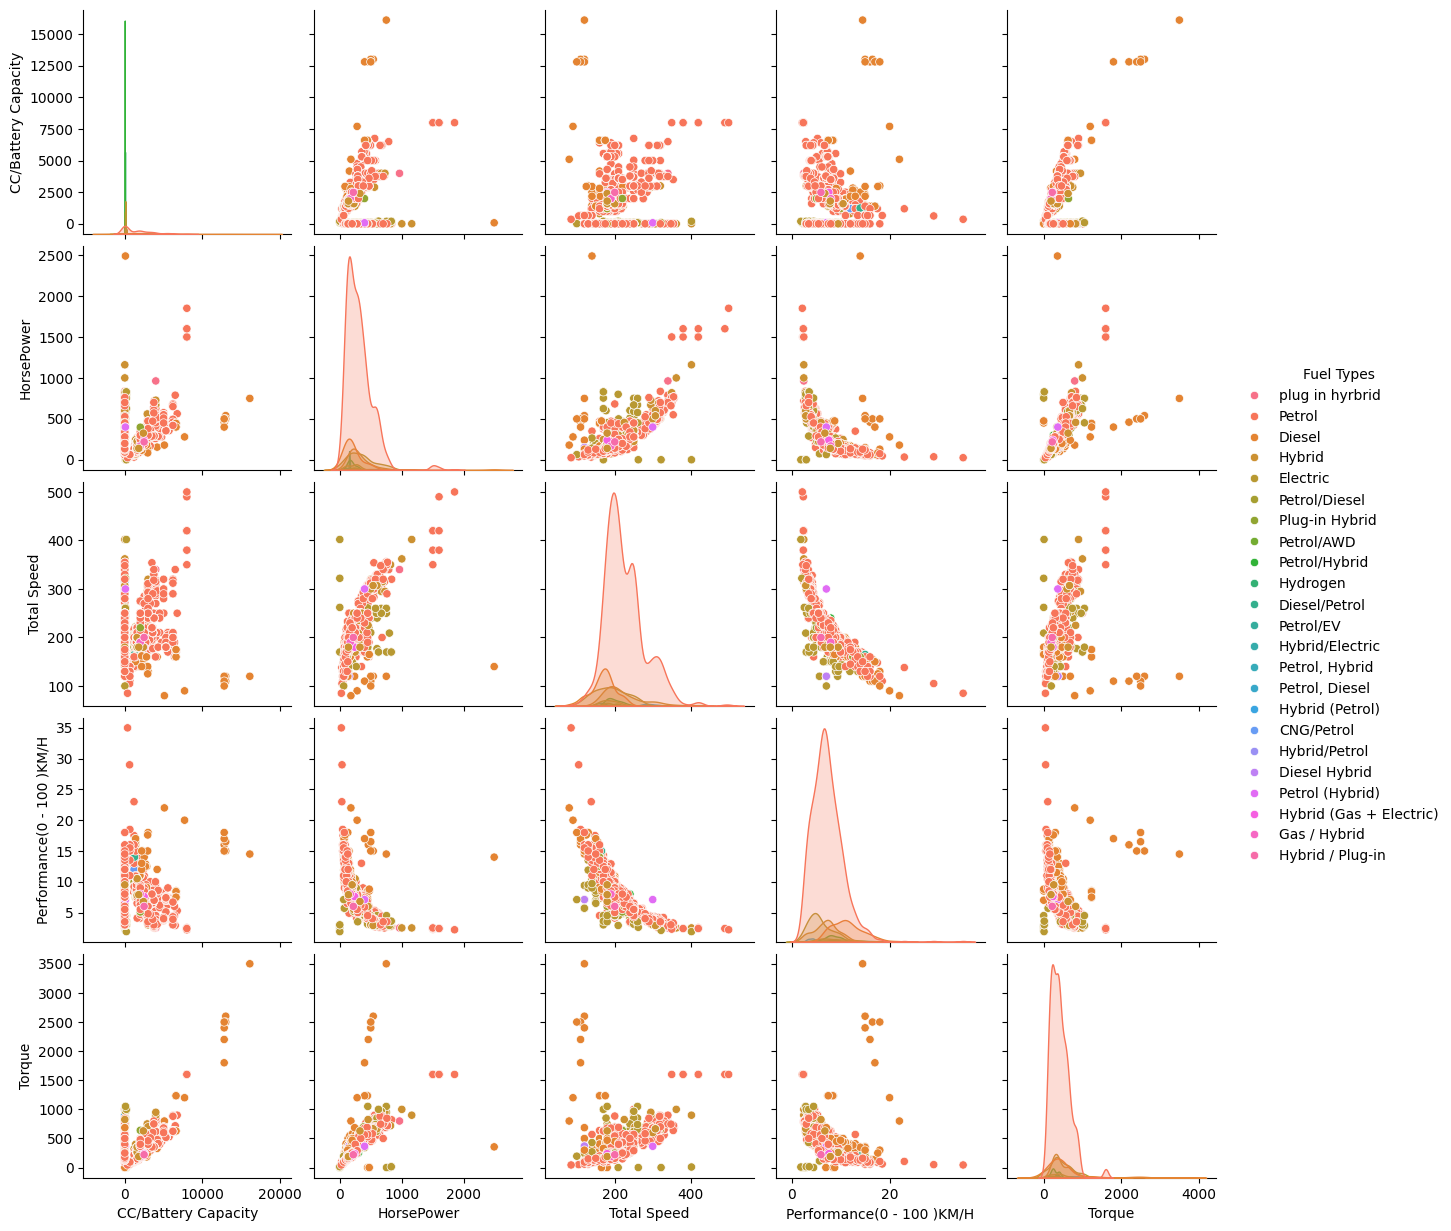

In [32]:
numeric_cols = [
    "CC/Battery Capacity",
    "HorsePower",
    "Total Speed",
    "Performance(0 - 100 )KM/H",
    "Torque"
]

sns.pairplot(df[numeric_cols + ["Fuel Types"]], hue="Fuel Types")
plt.show()

CONTROLLO OUTLIER 

CC/Battery Capacity: 92 outlier
HorsePower: 22 outlier
Total Speed: 13 outlier
Performance(0 - 100 )KM/H: 23 outlier
Torque: 26 outlier


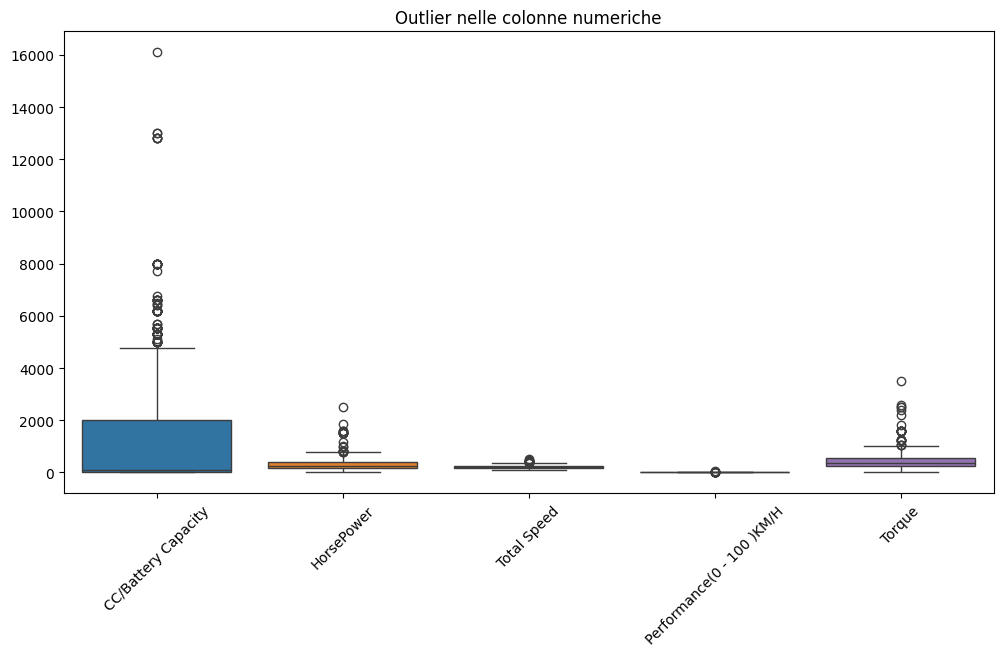

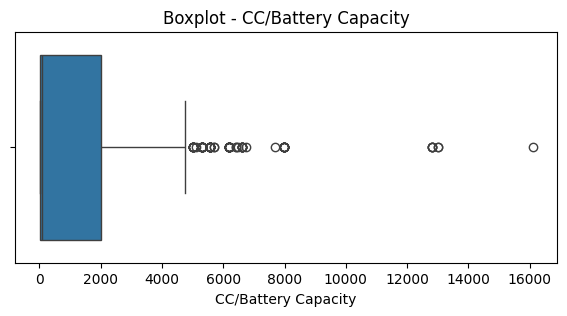

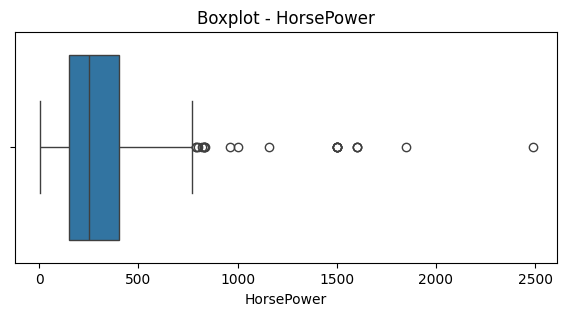

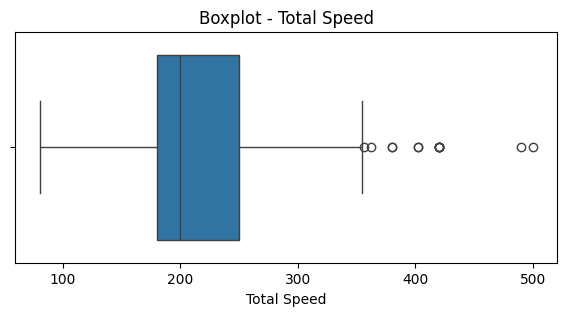

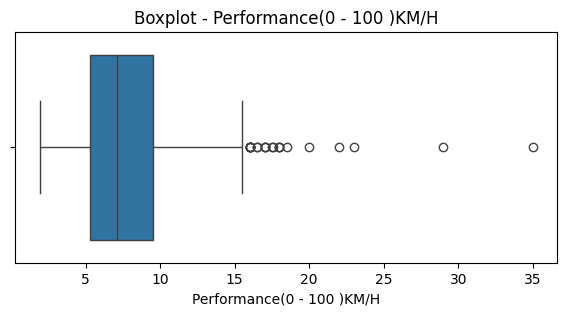

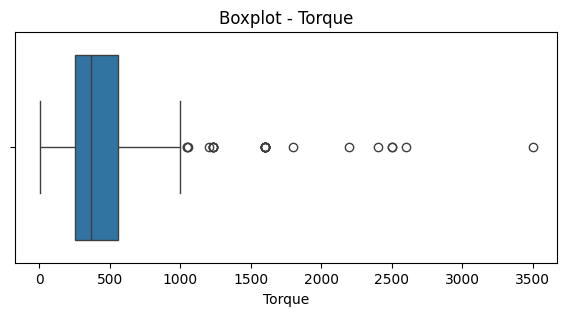

In [33]:
import pandas as pd

# Seleziona colonne numeriche
numeric_df = df.select_dtypes(include=['float64', 'int64'])

outliers = {}

for col in numeric_df.columns:
    Q1 = numeric_df[col].quantile(0.25)
    Q3 = numeric_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mask = (numeric_df[col] < lower_bound) | (numeric_df[col] > upper_bound)
    outliers[col] = numeric_df[col][mask]

# Stampa il numero di outlier per colonna
for col, values in outliers.items():
    print(f"{col}: {len(values)} outlier")
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Outlier nelle colonne numeriche")
plt.show()

# Boxplot individuali
for col in numeric_cols:
    plt.figure(figsize=(7,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()





In [34]:
import pandas as pd

outlier_table = []

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    mask = (df[col] < lower) | (df[col] > upper)
    outlier_values = df.loc[mask, col]
    
    for idx, value in outlier_values.items():
        outlier_table.append({
            "Index": idx,
            "Column": col,
            "Value": value,
            "Lower Bound": lower,
            "Upper Bound": upper
        })

outlier_df = pd.DataFrame(outlier_table)
outlier_df


,Index,Column,Value,Lower Bound,Upper Bound
0,1,CC/Battery Capacity,6749.0,-2995.000,4997.000
1,10,CC/Battery Capacity,6496.0,-2995.000,4997.000
2,383,CC/Battery Capacity,5552.0,-2995.000,4997.000
3,387,CC/Battery Capacity,5552.0,-2995.000,4997.000
4,400,CC/Battery Capacity,5552.0,-2995.000,4997.000
...,...,...,...,...,...
171,894,Torque,2400.0,-214.625,1024.375
172,895,Torque,1800.0,-214.625,1024.375
173,896,Torque,2500.0,-214.625,1024.375
174,897,Torque,1200.0,-214.625,1024.375


                           CC/Battery Capacity  HorsePower  Total Speed  \
CC/Battery Capacity                   1.000000    0.304714     0.130681   
HorsePower                            0.304714    1.000000     0.695005   
Total Speed                           0.130681    0.695005     1.000000   
Performance(0 - 100 )KM/H            -0.040396   -0.618717    -0.777120   
Torque                                0.499798    0.731757     0.435594   

                           Performance(0 - 100 )KM/H    Torque  
CC/Battery Capacity                        -0.040396  0.499798  
HorsePower                                 -0.618717  0.731757  
Total Speed                                -0.777120  0.435594  
Performance(0 - 100 )KM/H                   1.000000 -0.398504  
Torque                                     -0.398504  1.000000  


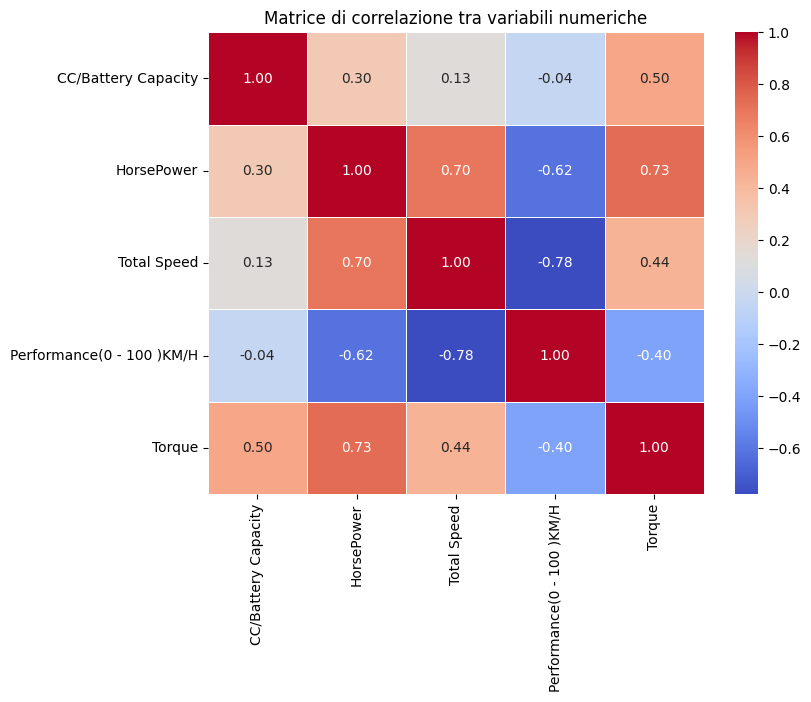

In [35]:
corr_matrix = numeric_df.corr()
print(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice di correlazione tra variabili numeriche")
plt.show()

1 CC/Battery Capacity & HorsePower -> Leggermente positivo: motori più grandi tendono ad avere più potenza
2 CC/Battery Capacity & Total Speed -> Quasi nessuna correlazione con la velocità massima
3 CC/Battery Capacity & Performance -> Nessuna correlazione significativa con accelerazione 0-100 km/h
4 HorsePower & Total SpeedCC/Battery Capacity & Torque -> Moderata correlazione: motori più grandi generano più coppia
5 HorsePower & Total Speed -> Alta correlazione: motori più potenti tendono a velocità massime maggiori
6 HorsePower & Performance -> Forte correlazione negativa: più potenza → accelerazione 0-100 km/h più veloce 
7 HorsePower & Torque -> Alta correlazione: motori più potenti generano più coppia
8 Total Speed & Performance -> Molto alta correlazione negativa: auto più veloci → accelerano più rapidamente
9 Total Speed & Torque -> Moderata correlazione positiva
10 Performance & Torque -> Leggera correlazione negativa: coppia maggiore aiuta nell’accelerazione

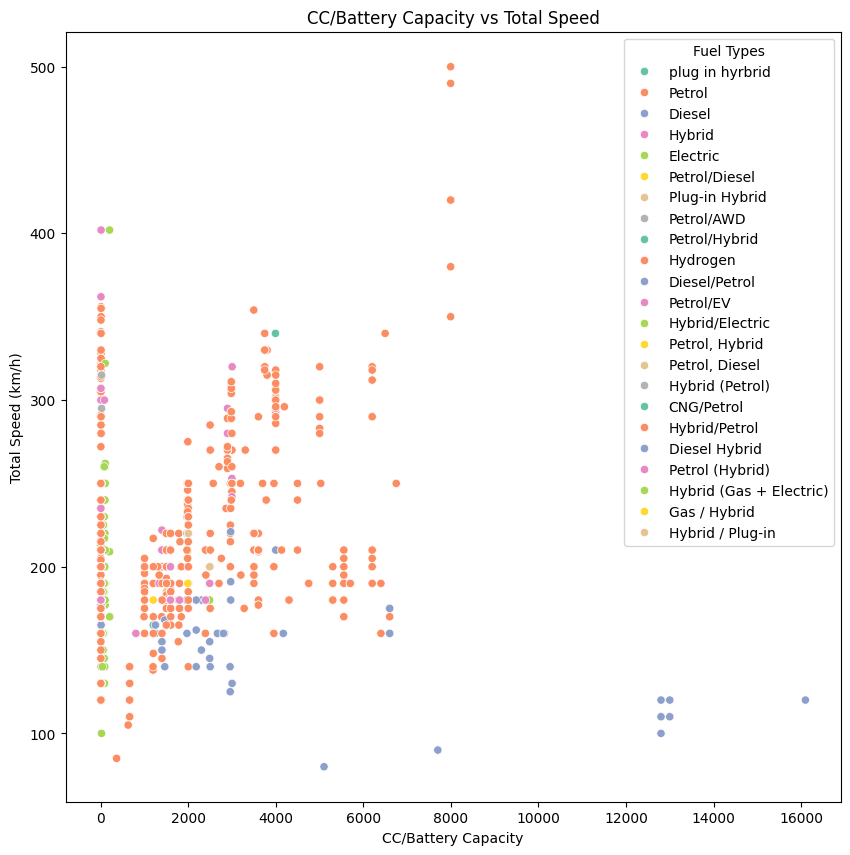

In [36]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="CC/Battery Capacity", y="Total Speed", data=df, hue="Fuel Types", palette="Set2")
plt.title("CC/Battery Capacity vs Total Speed")
plt.xlabel("CC/Battery Capacity")
plt.ylabel("Total Speed (km/h)")
plt.legend(title="Fuel Types")
plt.show()

CC/Battery Capacity vs Total Speed

capacità batteria (x) rispetto alla velocità massima (y).
I punti sono colorati per tipo di carburante.
I punti sono sparsi, senza una tendenza chiara → conferma la correlazione molto bassa
Anche con cilindrate/batterie grandi, la velocità massima non aumenta sistematicamente
Qualche outlier: auto molto potenti o supercar possono avere velocità alte con cilindrate più basse.
Quindi deduciamo che la capacità del motore o della batteria non è il fattore principale che determina la velocità massima.


float64
Numero di auto con HorsePower non valido: 0


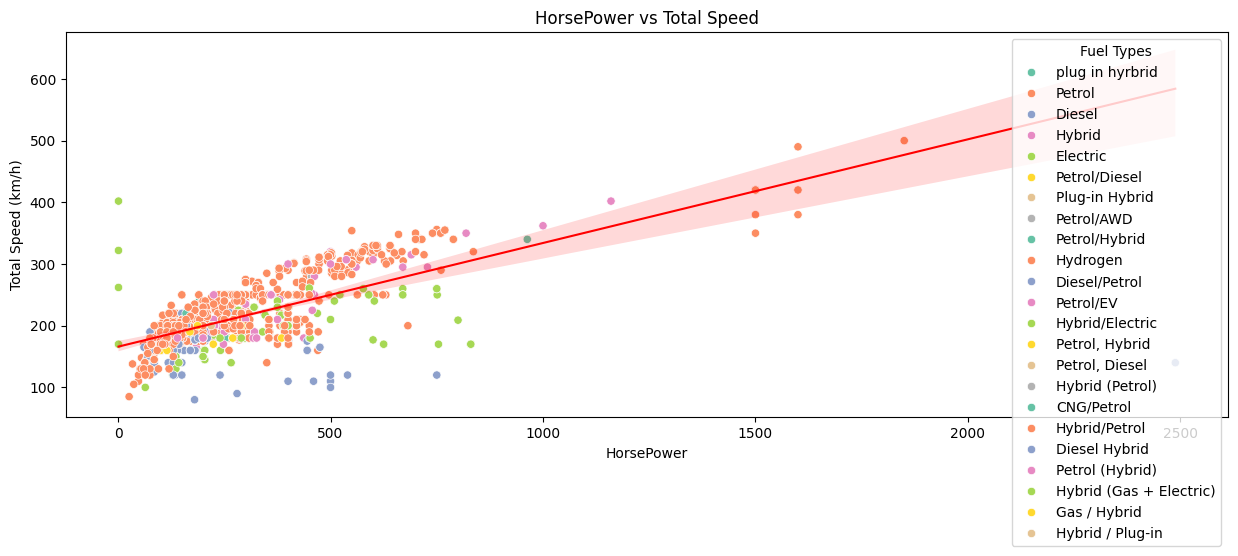

In [42]:
df_filtered = df[df["HorsePower"] > 0]
print(df["HorsePower"].dtype)
num_invalid_hp = df[(df["HorsePower"] == 0) | (df["HorsePower"].isna())].shape[0]
print(f"Numero di auto con HorsePower non valido: {num_invalid_hp}")
# Filtra le auto elettriche con HorsePower molto basso o velocità molto alta
df[df["Fuel Types"] == "Electric"][["HorsePower", "Total Speed", "Torque"]].sort_values(by="Total Speed", ascending=False)

plt.figure(figsize=(15,5))
sns.scatterplot(x="HorsePower", y="Total Speed",data=df_filtered,  hue="Fuel Types", palette="Set2")
sns.regplot(x="HorsePower", y="Total Speed", data=df_filtered, scatter=False, color="red", line_kws={"linewidth":1.5})
plt.title("HorsePower vs Total Speed")
plt.xlabel("HorsePower")
plt.ylabel("Total Speed (km/h)")
plt.legend(title="Fuel Types")
plt.show()

HorsePower Total Speed
potenza (HorsePower) / velocità massima (Total Speed)
Linea di regressione rossa che mostra la tendenza
Punti colorati per tipo di carburante.
Chiarissima tendenza positiva, come previsto dalla correlazione alta 
Auto con potenza maggiore tendono a velocità massime più alte
La linea rossa evidenzia la relazione lineare.
Alcuni punti sopra o sotto la linea → outlier o casi particolari 
Deduzione:
la potenza è un fattore determinante della velocità massima.
Osserviamo anche differenze tra tipi di carburante

FEATURE 1 EFEATURE 3  HorsePower / Torque: nuova colonna che misura quanti cavalli per unità di coppia

In [ ]:
import numpy as np

# Creiamo la nuova feature HP_per_Torque
# Sostituiamo eventuali Torque = 0 con NaN per evitare divisioni per zero
df["HP_per_Torque"] = df["HorsePower"] / df["Torque"].replace(0, np.nan)

# Facoltativo: se vuoi sostituire eventuali NaN con 0
df["HP_per_Torque"].fillna(0, inplace=True)

# Controllo delle prime righe
print(df[["HorsePower", "Torque", "HP_per_Torque"]].head())



   HorsePower  Torque  HP_per_Torque
0       963.0   800.0       1.203750
1       563.0   900.0       0.625556
2        70.0   100.0       0.700000
3       630.0   900.0       0.700000
4       602.0   560.0       1.075000
Massimo HorsePower: 2488.0
    Company Names Cars Names  HorsePower  Torque  Total Speed
255        Nissan      Urvan      2488.0   356.0        140.0


controllare valori unici per ogni colonna

In [47]:
for col in df.columns:
    print(f"--- {col} --- ({df[col].nunique()} valori unici)")
    print(df[col].unique())
    print()


--- Company Names --- (37 valori unici)
['FERRARI' 'ROLLS ROYCE' 'Ford' 'MERCEDES' 'AUDI' 'BMW' 'ASTON MARTIN'
 'BENTLEY' 'LAMBORGHINI' 'TOYOTA' 'NISSAN' 'ROLLS ROYCE ' 'VOLVO' 'KIA'
 'HONDA' 'KIA  ' 'HYUNDAI' 'MAHINDRA' 'MARUTI SUZUKI' 'Nissan'
 'Volkswagen' 'Porsche' 'Cadillac' 'Tata Motors' 'Tesla' 'Jeep' 'Mazda'
 'Chevrolet' 'GMC' 'Kia' 'Peugeot' 'Bugatti' 'Volvo' 'Jaguar Land Rover'
 'Acura' 'Mitsubishi' 'Toyota']

--- Cars Names --- (1201 valori unici)
['SF90 STRADALE' 'PHANTOM' 'KA+' ... 'Corolla Cross' 'C-HR+ '
 'RAV4 (6th Gen)']

--- Engines --- (356 valori unici)
['V8' 'V12' '1.2L Petrol' 'V10' 'I4' 'BOXER-4' 'V6' 'ELECTRIC MOTOR' 'I6'
 'ELECTRIC ' 'ELECTRIC' 'I3' 'I4 + ELECTRIC' 'HYBRID'
 '1.2L,4-CYLINDER,INLINE-4(I4)' '1.4L,4-CYLINDER,INLINE-4(I4)'
 '2.0L,4-CYLINDER,INLINE-4(I4)' '2.2L,4-CYLINDER,INLINE-4(I4)'
 '1.5L,4-CYLINDER,INLINE(I4)' '2.0L,4-CYLINDER,WITH HYBRID SYSTEM'
 '1.6L,TURBOCHARGED INLINE-3' '3.3L,V6,TWIN TURBO DIESEL'
 '3.5L,V6,HYBRID TWIN-TURBO' '2.0L,INLINE

In [ ]:
import pandas as pd

# Copia di sicurezza
df["Fuel Types Raw"] = df["Fuel Types"]

def clean_fuel_type(fuel):
    if pd.isna(fuel):
        return "Unknown"

    fuel = fuel.strip().lower()

    # --- Electric ---
    if "electric" in fuel and "hybrid" not in fuel:
        return "Electric"

    # --- Hydrogen ---
    if "hydrogen" in fuel:
        return "Hydrogen"

    # --- CNG ---
    if "cng" in fuel:
        return "CNG"

    # --- Plug-in Hybrid ---
    if ("plug" in fuel) or ("plug-in" in fuel) or ("plug in" in fuel):
        return "Plug-in Hybrid"

    # --- Hybrid generico ---
    if "hybrid" in fuel or "ev" in fuel:  
        return "Hybrid"

    # --- Petrol ---
    if "petrol" in fuel or "gasoline" in fuel:
        return "Petrol"

    # --- Diesel ---
    if "diesel" in fuel:
        return "Diesel"

    return "Other"

# Applica la pulizia
df["Fuel Types"] = df["Fuel Types"].apply(clean_fuel_type)

# Mostra i nuovi valori unici
print("Valori unici puliti:")
print(df["Fuel Types"].unique())

# Conta le categorie
print("\nConteggio categorie:")
print(df["Fuel Types"].value_counts())


Valori unici puliti:
['Plug-in Hybrid' 'Petrol' 'Diesel' 'Hybrid' 'Electric' 'Hydrogen' 'CNG']

Conteggio categorie:
Fuel Types
Petrol            896
Hybrid            108
Diesel            106
Electric           97
Plug-in Hybrid      7
Hydrogen            3
CNG                 1
Name: count, dtype: int64


FUNZIONE GROUPBY group_df = clean_df.groupby(col).count()
clean_df[col].nunique()

FUNZIONI 